<a href="https://colab.research.google.com/github/PradyumnaGupta/Neural_network_implementation_from_scratch/blob/master/NN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle

In [0]:
#data=pd.read_csv("clusterincluster.txt",sep=" ",header=None)
#data=shuffle(data)
#X=np.array(data.iloc[:,0:-1].values)
#data=np.loadtxt('clusterincluster.txt',delimiter=' ')
#data2=np.loadtxt('clusterincluster.txt',delimiter=' ')
data=pd.read_csv('heart.csv',sep=',',)
#print(data4)
data=np.array(data)
X_train=np.array(data[:,:-1].T)
Y_train=np.array([data[:,-1]])
X_train=(X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
#print(Y_train.shape)

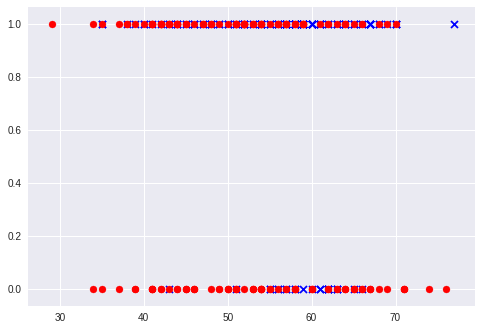

In [4]:
#print(data[data[:,2].argsort()][range(np.sum(data[:,-1]==0)),:])
plt.figure()
plt.scatter(data[data[:,-1].argsort()][range(np.sum(data[:,-1]==0)),0],data[data[:,-1].argsort()][range(np.sum(data[:,-1]==0)),1],color="blue",marker="x")
plt.scatter(data[data[:,-1].argsort()[::-1]][range(np.sum(data[:,-1]==1)),0],data[data[:,-1].argsort()[::-1]][range(np.sum(data[:,-1]==1)),1],color="red",marker="o")
plt.show()

In [0]:
def sigmoid(Z):
  return 1./(1+np.exp(-Z))

In [0]:
def relu(Z):
  #return 1./(1+np.exp(-Z))#Z*(Z>0)
  return Z*(Z>=0)

In [0]:
def relu_der(Z):
  #return Z*(1-Z)
  return 1*(Z>0)

In [0]:
def initialize_parameters(layer_dims):
  layers=len(layer_dims)
  parameters={}
  np.random.seed(2)
  for i in range(1,layers):
    parameters["W"+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*np.sqrt(2/layer_dims[i-1])
    parameters["b"+str(i)]=np.random.randn(layer_dims[i],1)
  #parameters["W"+str(layers-1)]=np.random.randn(layer_dims[layers-1],layer_dims[layers-2])*np.sqrt(2/layer_dims[layers-2])
  #parameters["b"+str(i)]=np.zeros((layer_dims[layers-1],1))  
  return parameters

In [0]:
def forward_propagation(X,parameters):
  cache={}
  cache["A0"]=X
  l=int(len(parameters)/2)
  for i in range(l-1):
    cache["Z"+str(i+1)]=np.dot(parameters["W"+str(i+1)],cache["A"+str(i)])+parameters["b"+str(i+1)]
    cache["A"+str(i+1)]=relu(cache["Z"+str(i+1)])
  cache["Z"+str(l)]=np.dot(parameters["W"+str(l)],cache["A"+str(l-1)])+parameters["b"+str(l)]
  cache["A"+str(l)]=sigmoid(cache["Z"+str(l)])
  AL=cache["A"+str(l)]
  #print(cache["A"+str(l)].shape)
  return AL,cache

In [0]:
def compute_cost(cache,Y,l):
  AL=cache["A"+str(l)]
  #print(Y.shape)
  cost=(-1/Y.shape[1])*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
  return cost 

In [0]:
def backward_propagation(cache,parameters,Y):
  grads={}
  l=int(len(parameters)/2)
  #print("yo1"+str(l))
  #print(cache["A"+str(l)])
  #for i in reversed(range(1,l+1)):
  #  grads["VdW"+str(i)]=0
  #  grads["Vdb"+str(i)]=0
  #  grads["SdW"+str(i)]=0
  #  grads["Sdb"+str(i)]=0
    
  grads["dA"+str(l)]=-np.divide(Y,cache["A"+str(l)])+np.divide(1-Y,1-cache["A"+str(l)])  ## this may have problem 
  grads["dZ"+str(l)]=grads["dA"+str(l)]*(cache["A"+str(l)]*(1-cache["A"+str(l)]))
  grads["dW"+str(l)]=(1/Y.shape[0])*np.dot(grads["dZ"+str(l)],cache["A"+str(l-1)].T)
  grads["db"+str(l)]=(1/Y.shape[0])*np.sum(grads["dZ"+str(l)],axis=1,keepdims=True)
  #grads["VdW"+str(l)]=0.9*grads["VdW"+str(l)]+(1-0.9)*grads["dW"+str(l)]
  #grads["Vdb"+str(l)]=0.9*grads["Vdb"+str(l)]+(1-0.9)*grads["db"+str(l)]
  #grads["SdW"+str(l)]=0.999*grads["SdW"+str(l)]+(1-0.999)*(grads["dW"+str(l)]*grads["dW"+str(l)])
  #grads["Sdb"+str(l)]=0.999*grads["Sdb"+str(l)]+(1-0.999)*(grads["db"+str(l)]*grads["db"+str(l)])
  #print("y")
  for i in reversed(range(1,l)):
    #print(i)
    grads["dZ"+str(i)]=np.dot(parameters["W"+str(i+1)].T,grads["dZ"+str(i+1)])*relu_der(cache["A"+str(i)])
    grads["dW"+str(i)]=(1/Y.shape[0])*np.dot(grads["dZ"+str(i)],cache["A"+str(i-1)].T)
    grads["db"+str(i)]=(1/Y.shape[0])*np.sum(grads["dZ"+str(i)],axis=1,keepdims=True)
    #grads["VdW"+str(i)]=0.9*grads["VdW"+str(i)]+(1-0.9)*grads["dW"+str(i)]
    #grads["Vdb"+str(i)]=0.9*grads["Vdb"+str(i)]+(1-0.9)*grads["db"+str(i)]
    #grads["SdW"+str(i)]=0.999*grads["SdW"+str(i)]+(1-0.999)*(grads["dW"+str(i)]*grads["dW"+str(i)])
    #grads["Sdb"+str(i)]=0.999*grads["Sdb"+str(i)]+(1-0.999)*(grads["db"+str(i)]*grads["db"+str(i)])
  return grads

In [0]:
def NN_model(layer_dims,X,Y,learning_rate,epoch):
  layer_dims[0]=X.shape[0]
  parameters=initialize_parameters(layer_dims)
  costs=np.array([])
  #print(costs.shape)
  l=int(len(parameters)/2)
  #print(l)
  for i in range(epoch+1):
    _,cache=forward_propagation(X,parameters)
    cost=compute_cost(cache,Y,l)
    #print("yo")
    grads=backward_propagation(cache,parameters,Y)
    #print(grads["dW"+str(1)])
    for j in range(l):
      parameters["W"+str(j+1)]=parameters["W"+str(j+1)]-(learning_rate/(1+0.001*i))*(grads["dW"+str(j+1)])#(grads["VdW"+str(j+1)]/(np.sqrt(grads["VdW"+str(j+1)])+1e-4))#(grads["dW"+str(j+1)])
      parameters["b"+str(j+1)]=parameters["b"+str(j+1)]-(learning_rate/(1+0.001*i))*(grads["db"+str(j+1)])#(grads["Vdb"+str(j+1)]/(np.sqrt(grads["Sdb"+str(j+1)])+1e-4))#(grads["db"+str(j+1)])
    #print(i) 
    if (i%1000)==0 :
      print("cost after iteration",i,"=",cost)
      costs=np.append(costs,cost)
      #print(i)
  costs=np.array(costs)    
  np.squeeze(costs)
  #print(costs.shape)
  #print(np.arange(0,6)*100)
  plt.figure()
  plt.plot(np.arange(0,int(epoch/1000)+1)*1000,costs,marker="x")
  plt.show()
  return cost,parameters

cost after iteration 0 = 0.9958249256965752
cost after iteration 1000 = 0.5761646958762102
cost after iteration 2000 = 0.5650313326961566
cost after iteration 3000 = 0.5590239678092054
cost after iteration 4000 = 0.545489871212208
cost after iteration 5000 = 0.5367382893748497
cost after iteration 6000 = 0.5292741184125762
cost after iteration 7000 = 0.5209827111620634
cost after iteration 8000 = 0.5130048923781941
cost after iteration 9000 = 0.5077311218305887
cost after iteration 10000 = 0.4979853360002443
cost after iteration 11000 = 0.4884687747894451
cost after iteration 12000 = 0.4851055726215666
cost after iteration 13000 = 0.4769819894638634
cost after iteration 14000 = 0.47030120062392394
cost after iteration 15000 = 0.46324758732695914
cost after iteration 16000 = 0.4600501955096359
cost after iteration 17000 = 0.45334780115276035
cost after iteration 18000 = 0.44297790426651795
cost after iteration 19000 = 0.4391365198725988
cost after iteration 20000 = 0.4404890522202629
co

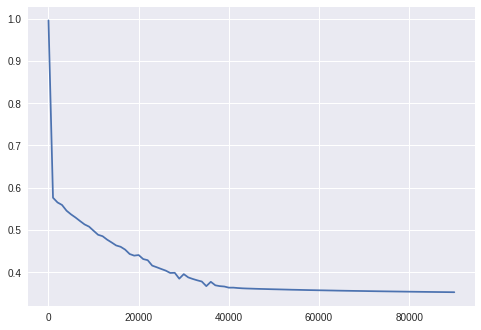

cost= 0.352545450289538


In [293]:
cost,parameters=NN_model([0,13,13,1],X_train,Y_train,learning_rate=0.0009,epoch=90000)
print("cost=",cost)

In [0]:
def predict(X,Y,parameters):
  yhat,_=forward_propagation(X,parameters)
  #print(yhat)
  yhat=yhat>0.5
  accuracy=np.mean(yhat==Y)*100
  return accuracy

In [295]:
accuracy=predict(X_train,Y_train,parameters)
print(accuracy)

83.4983498349835
